<a href="https://colab.research.google.com/github/rithikalite/earthquake-detection-using-aiml/blob/main/Earthquake_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy

In [ ]:
! pip install pandas
! pip install seaborn

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/earthquake_1995-2023.csv')

In [ ]:
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

In [ ]:
df.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.940150,3.605000,6.02700,0.325000,847.915000,193.918000,1.125174,20.926290,74.612541,4.315554,51.486576
std,0.438148,3.328972,1.43399,0.468609,301.802632,239.045858,2.073164,24.415895,130.812590,26.633320,117.478302
min,6.500000,0.000000,1.00000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.00000,0.000000,691.000000,0.000000,0.000000,0.000000,16.000000,-13.518500,-71.694450
50%,6.800000,4.000000,6.00000,0.000000,744.000000,0.000000,0.000000,18.000000,29.000000,-2.443500,107.791000
75%,7.100000,7.000000,7.00000,1.000000,874.250000,403.000000,1.549250,27.000000,55.000000,25.167250,148.364750
max,9.100000,9.000000,10.00000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


In [ ]:
df.isnull().sum()/df.shape[0]*100

,0
title,0.0
magnitude,0.0
date_time,0.0
cdi,0.0
mmi,0.0
alert,55.1
tsunami,0.0
sig,0.0
net,0.0
nst,0.0


In [ ]:
df.columns

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country'],
      dtype='object')

In [ ]:
df.drop(['title', 'continent', 'alert','location'],axis=1,inplace=True)

In [ ]:
df['date_time']=pd.to_datetime(df['date_time'])
df['Year']=pd.DatetimeIndex(df["date_time"]).year
df['Month']=pd.DatetimeIndex(df["date_time"]).month
df.drop('date_time',axis=1,inplace=True)

In [ ]:
df.head()

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,country,Year,Month
0,6.5,7,4,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,Vanuatu,2023,8
1,6.5,8,6,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,NaN,2023,7
2,6.6,7,5,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,Argentina,2023,7
3,7.2,6,6,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,NaN,2023,7
4,7.3,0,5,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,NaN,2023,7


In [ ]:
df.isnull().sum()

,0
magnitude,0
cdi,0
mmi,0
tsunami,0
sig,0
net,0
nst,0
dmin,0
gap,0
magType,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

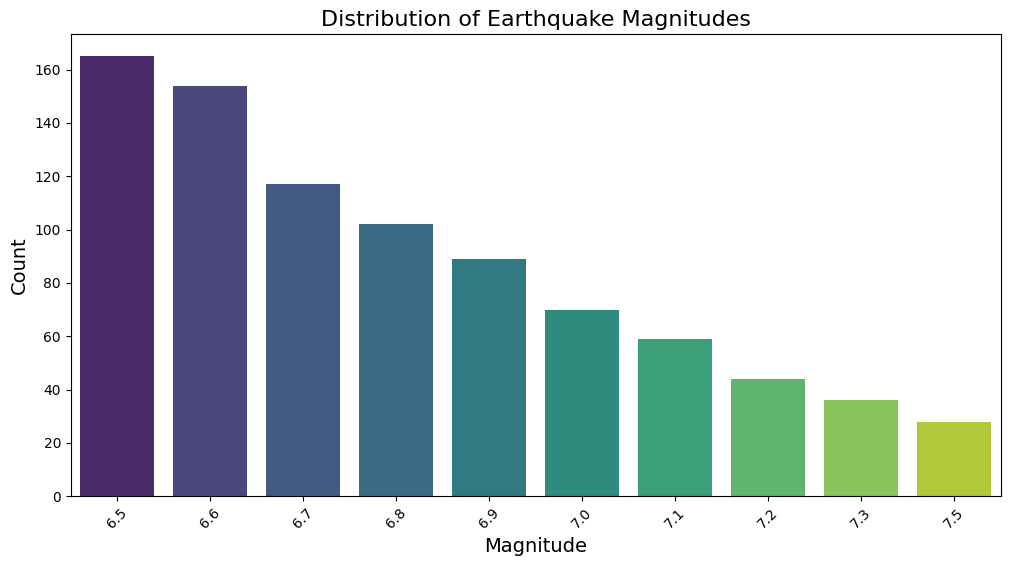

In [ ]:
Morder=df['magnitude'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.countplot(x='magnitude', data=df, palette='viridis',order=Morder)
plt.title('Distribution of Earthquake Magnitudes', fontsize=16)
plt.xlabel('Magnitude', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

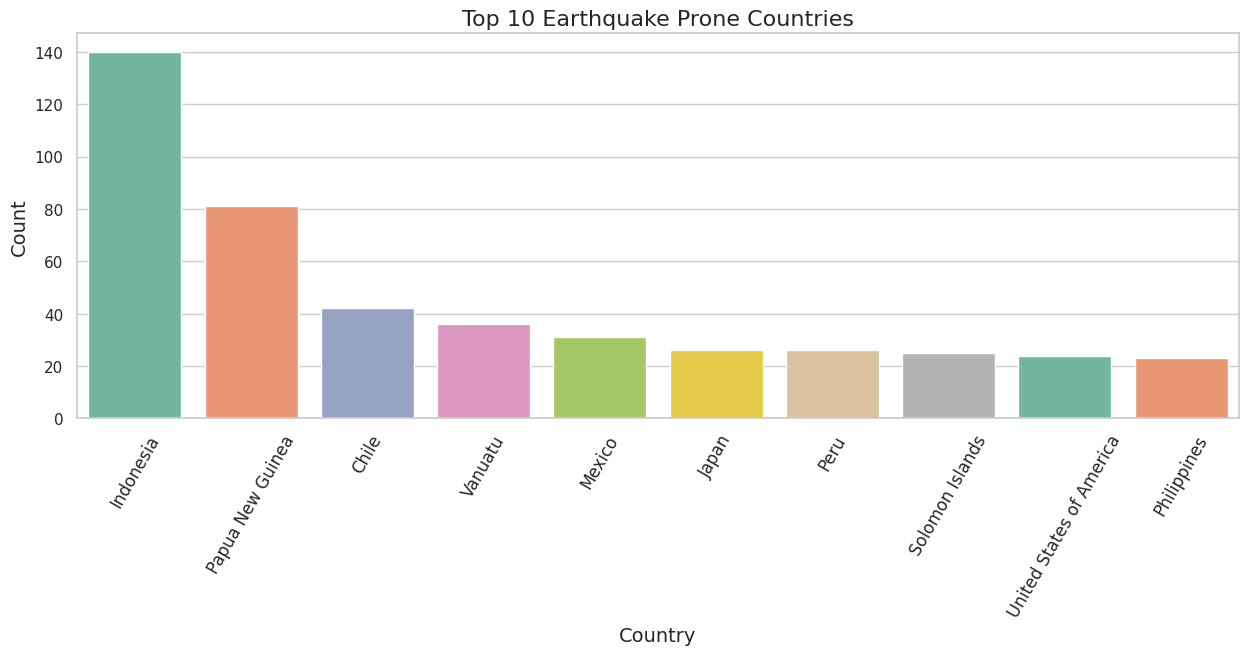

In [ ]:
o = df['country'].value_counts().head(10).index

plt.figure(figsize=(15, 5))

sns.set(style="whitegrid")
sns.countplot(x='country', data=df, order=o, palette='Set2')
plt.xticks(rotation=60, fontsize=12)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Top 10 Earthquake Prone Countries', fontsize=16)
plt.show()

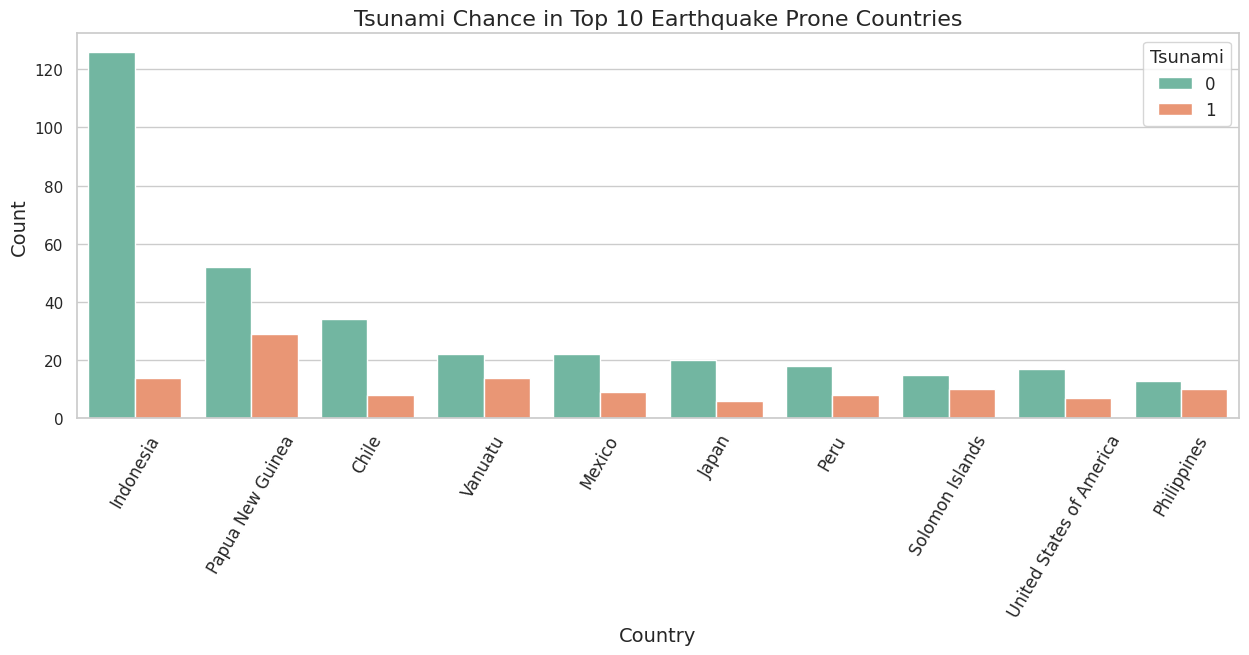

In [ ]:
o = df['country'].value_counts().head(10).index

plt.figure(figsize=(15, 5))

sns.set(style="whitegrid")

sns.countplot(x='country', data=df, order=o, hue='tsunami', palette='Set2')

plt.xticks(rotation=60, fontsize=12)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Tsunami Chance in Top 10 Earthquake Prone Countries', fontsize=16)
plt.legend(title='Tsunami', title_fontsize='13', fontsize='12')

In [ ]:
country_count = df.groupby('country')['tsunami'].value_counts().unstack(fill_value=0)
country_count.columns = ['No Tsunami', 'Tsunami']
country_count['Earthquake']=country_count['No Tsunami']+country_count['Tsunami']
country_count['Tsunami Probability']=round((country_count['Tsunami']/country_count['Earthquake'])*100,2)

# Filter out countries with a minimum number of earthquakes
threshold = 5
filtered_country=country_count[country_count['Earthquake']>threshold]
top_10_tsunami_countries=filtered_country.sort_values(by='Tsunami Probability',ascending=False).head(15)
print(top_10_tsunami_countries[['Tsunami Probability', 'Earthquake']])

                          Tsunami Probability  Earthquake
country                                                  
Fiji                                    80.00          10
New Zealand                             55.56           9
Ecuador                                 50.00          10
Philippines                             43.48          23
Solomon Islands                         40.00          25
Vanuatu                                 38.89          36
Papua New Guinea                        35.80          81
Argentina                               33.33           6
Taiwan                                  33.33           9
Peru                                    30.77          26
United States of America                29.17          24
Mexico                                  29.03          31
Russia                                  26.32          19
Colombia                                25.00           8
Japan                                   23.08          26


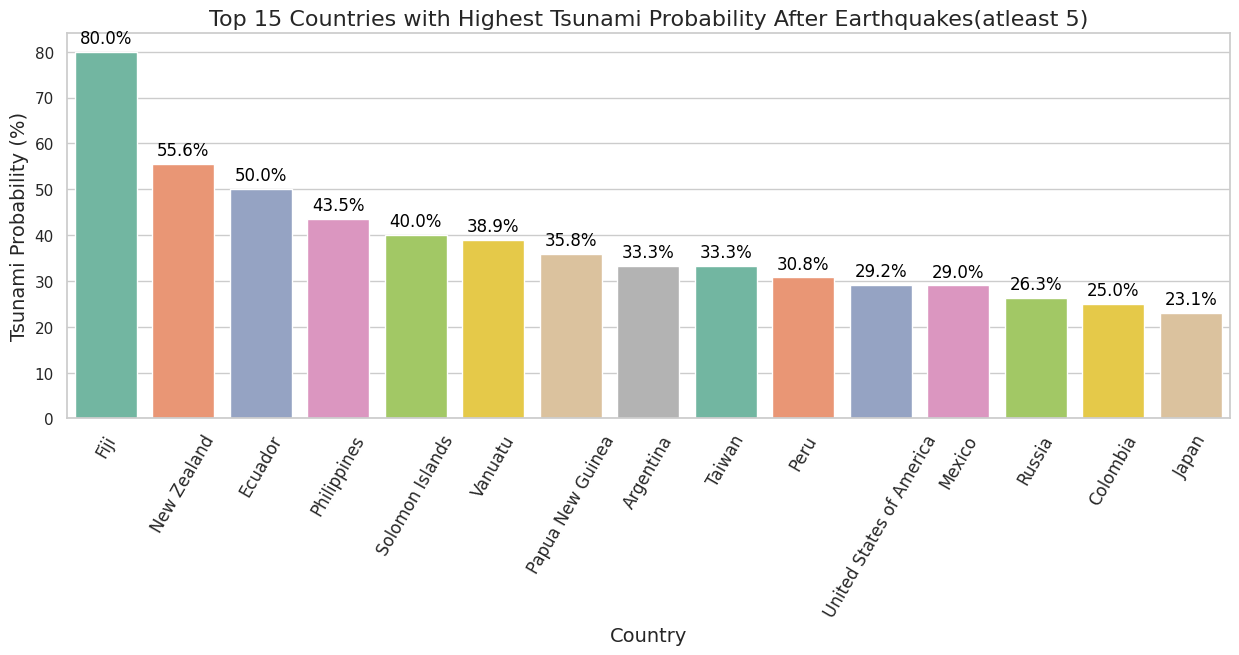

In [ ]:
plt.figure(figsize=(15, 5))
ax=sns.barplot(x=top_10_tsunami_countries.index, y=top_10_tsunami_countries['Tsunami Probability'], palette='Set2')
plt.xticks(rotation=60, fontsize=12)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Tsunami Probability (%)', fontsize=14)
plt.title('Top 15 Countries with Highest Tsunami Probability After Earthquakes(atleast 5)', fontsize=16)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()+3),
                ha='center', va='center',fontsize=12, color='black')

In [ ]:
pd.crosstab(df['magnitude'], df['tsunami']).head()

tsunami,0,1
magnitude,,
6.5,112,53
6.6,109,45
6.7,84,33
6.8,68,34
6.9,50,39


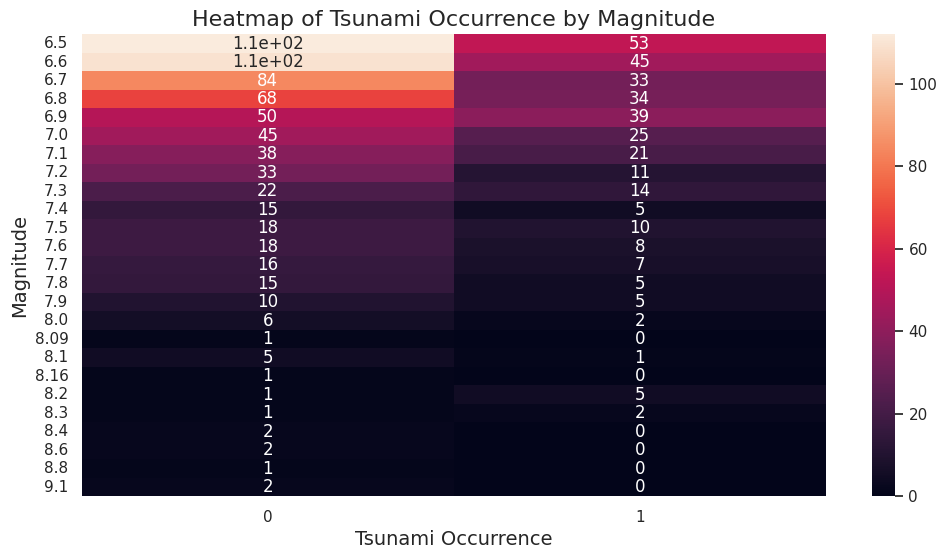

In [ ]:
heatmap_data = pd.crosstab(df['magnitude'], df['tsunami'])
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True)
plt.xlabel('Tsunami Occurrence', fontsize=14)
plt.ylabel('Magnitude', fontsize=14)
plt.title('Heatmap of Tsunami Occurrence by Magnitude', fontsize=16)
plt.show()

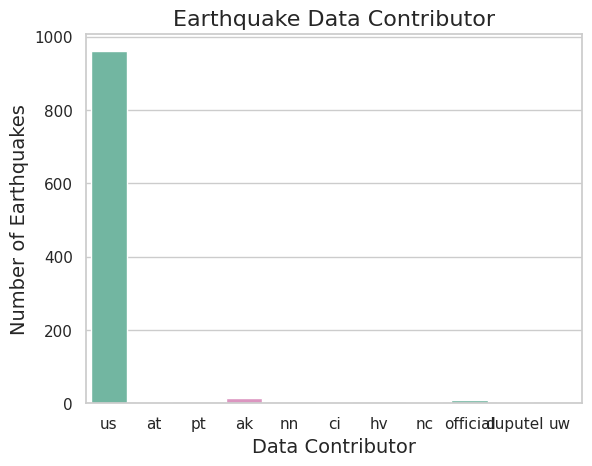

In [ ]:
sns.countplot(x='net',data=df,palette='Set2')
plt.title('Earthquake Data Contributor', fontsize=16)
plt.xlabel('Data Contributor', fontsize=14)
plt.ylabel('Number of Earthquakes', fontsize=14)
plt.show()

Text(0, 0.5, 'Count')

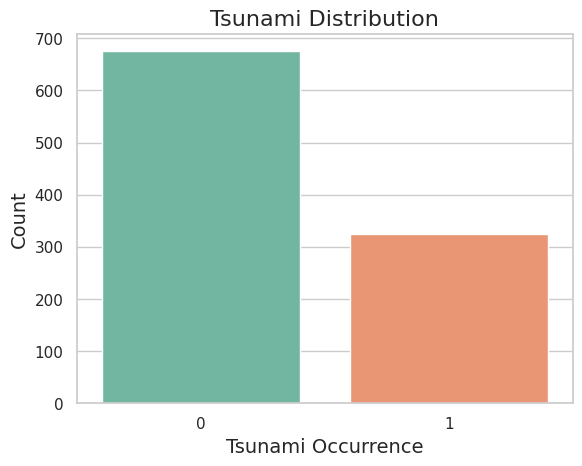

In [ ]:
sns.countplot(x='tsunami', data=df, palette='Set2')

plt.title('Tsunami Distribution', fontsize=16)
plt.xlabel('Tsunami Occurrence', fontsize=14)
plt.ylabel('Count', fontsize=14)

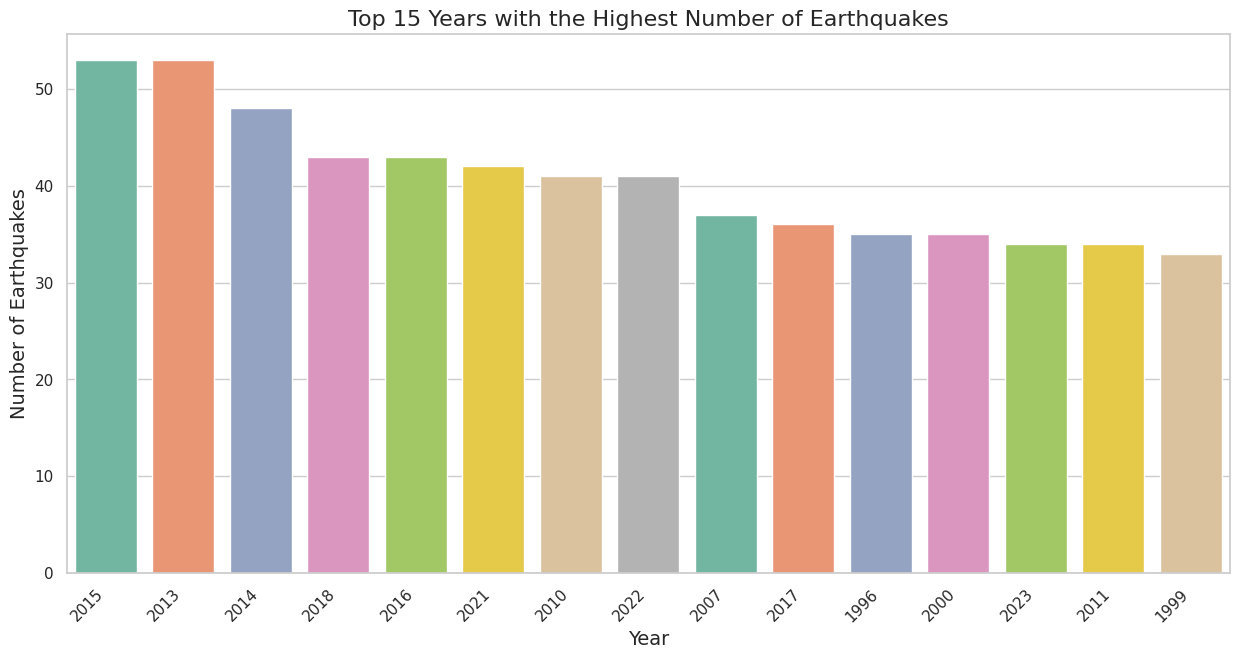

In [ ]:
plt.figure(figsize=(15, 7))

top_years = df['Year'].value_counts().head(15).index
sns.countplot(x='Year', data=df, order=top_years, palette='Set2')
plt.title('Top 15 Years with the Highest Number of Earthquakes', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Earthquakes', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.show()

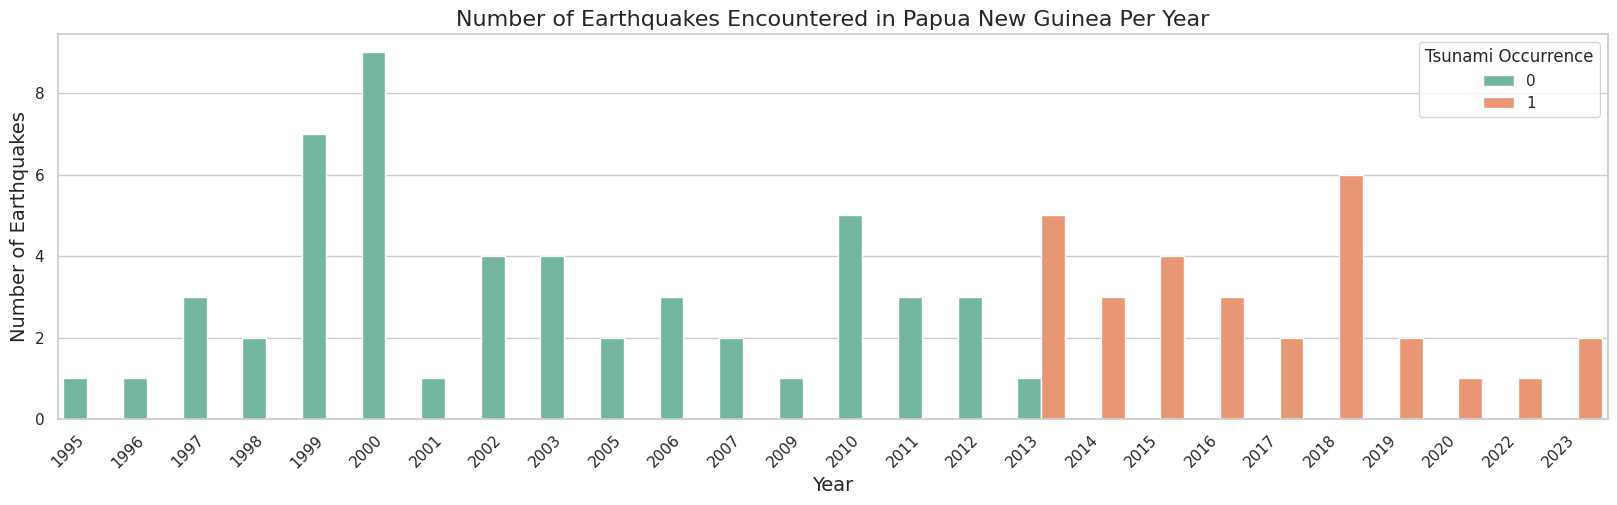

In [ ]:
Papua=df[df['country']=='Papua New Guinea']

plt.figure(figsize=(20, 5))
sns.countplot(x='Year', data=Papua, hue='tsunami', palette='Set2')

plt.title('Number of Earthquakes Encountered in Papua New Guinea Per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Earthquakes', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.legend(title='Tsunami Occurrence')

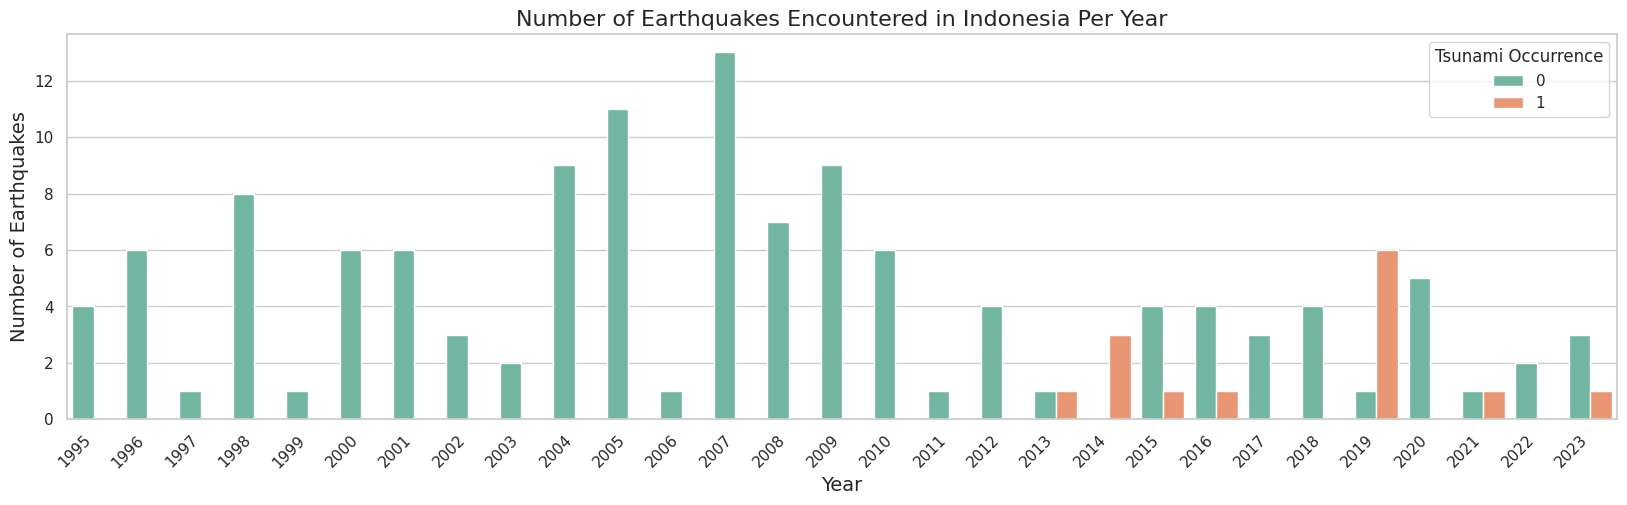

In [ ]:
Indo = df[df['country'] == 'Indonesia']
plt.figure(figsize=(20, 5))
sns.countplot(x='Year', data=Indo, hue='tsunami', palette='Set2')
plt.title('Number of Earthquakes Encountered in Indonesia Per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Earthquakes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tsunami Occurrence')
plt.show()

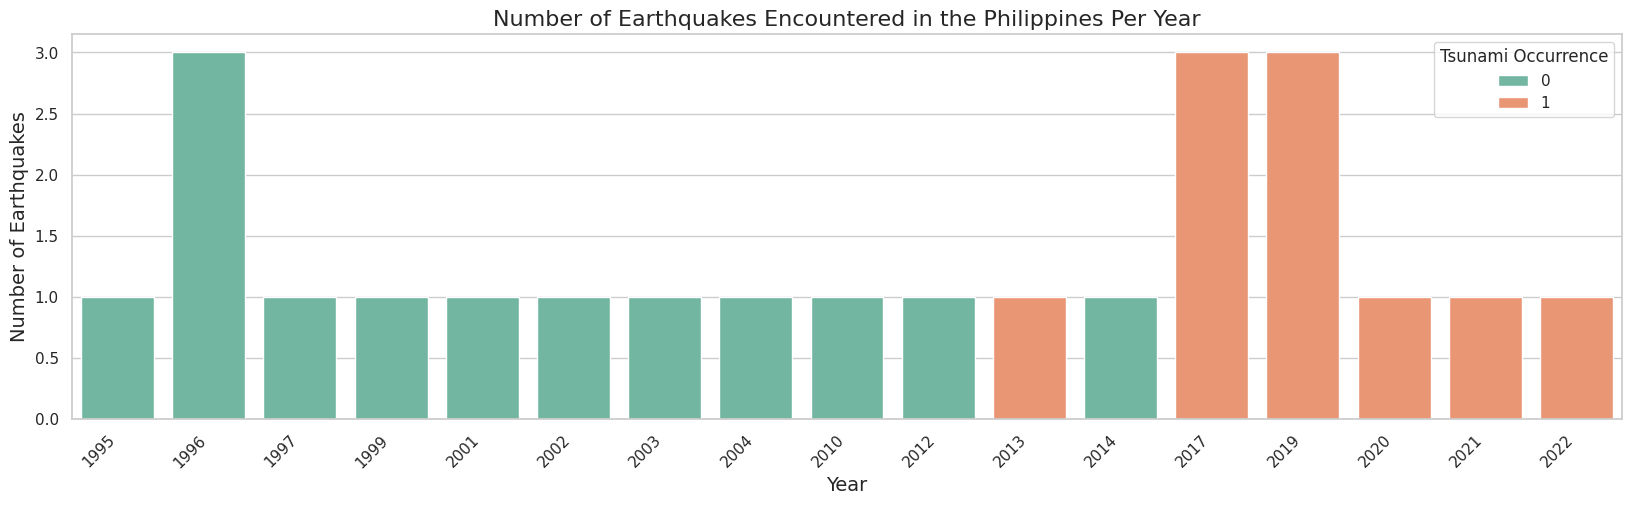

In [ ]:
Phi = df[df['country'] == 'Philippines']
plt.figure(figsize=(20, 5))
sns.countplot(x='Year', data=Phi, hue='tsunami', palette='Set2')
plt.title('Number of Earthquakes Encountered in the Philippines Per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Earthquakes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tsunami Occurrence')
plt.show()

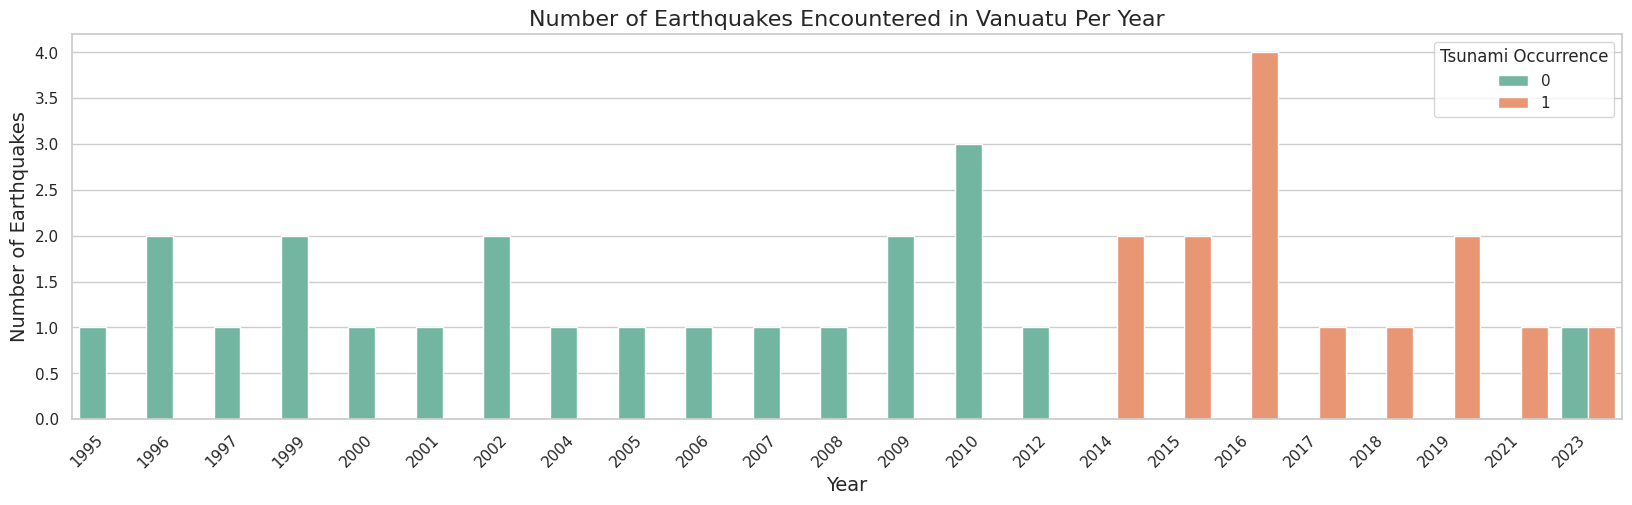

In [ ]:
Van = df[df['country'] == 'Vanuatu']
plt.figure(figsize=(20, 5))
sns.countplot(x='Year', data=Van, hue='tsunami', palette='Set2')
plt.title('Number of Earthquakes Encountered in Vanuatu Per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Earthquakes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tsunami Occurrence')
plt.show()

In [ ]:
df.head()

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,country,Year,Month
0,6.5,7,4,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,Vanuatu,2023,8
1,6.5,8,6,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,NaN,2023,7
2,6.6,7,5,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,Argentina,2023,7
3,7.2,6,6,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,NaN,2023,7
4,7.3,0,5,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,NaN,2023,7


In [ ]:
obj=df.select_dtypes(include=['object'])
obj

,net,magType
0,us,mww
1,us,mww
2,us,mww
3,us,mww
4,at,Mi
...,...,...
995,us,mwb
996,us,mw
997,us,mw
998,us,mw


In [ ]:
obj.nunique()

,0
net,11
magType,9


In [ ]:
obj.drop('net',axis=1,inplace=True)
df.drop(['net','magType'],axis=1,inplace=True)
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
obj_lbl=obj.apply(lr.fit_transform)
df=pd.concat([df,obj_lbl],axis=1)
df.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,magType
0,6.5,7,4,0,657,114,7.177000,25.0,192.955,-13.8814,167.1580,2023,8,8
1,6.5,8,6,0,775,92,0.679000,40.0,69.727,12.8140,-88.1265,2023,7,8
2,6.6,7,5,0,899,70,1.634000,28.0,171.371,-38.1911,-70.3731,2023,7,8
3,7.2,6,6,1,860,173,0.907000,36.0,32.571,54.3844,-160.6990,2023,7,8
4,7.3,0,5,1,820,79,0.879451,172.8,21.000,54.4900,-160.7960,2023,7,0


<Axes: >

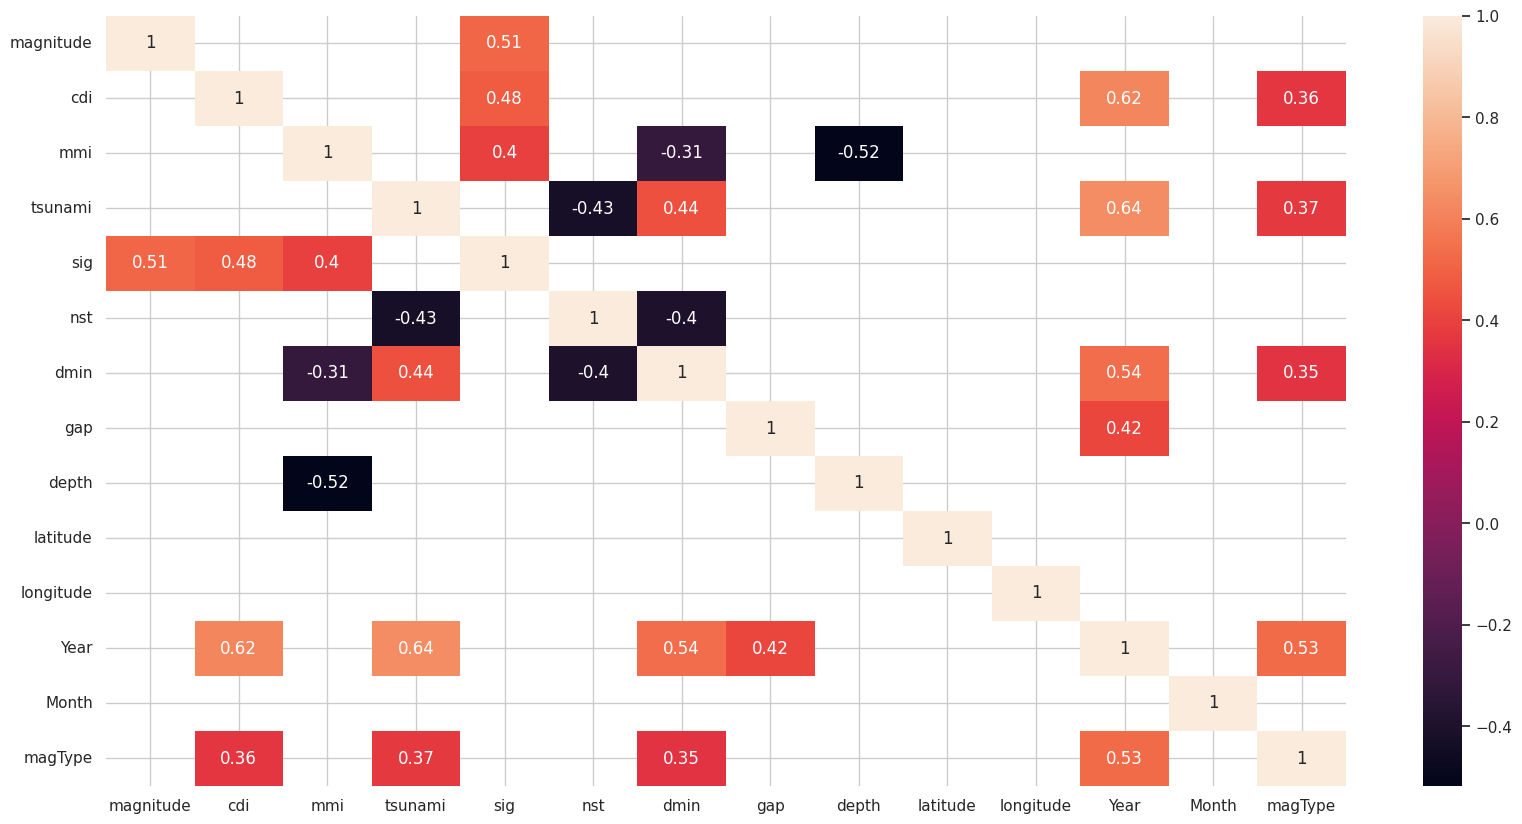

In [ ]:
d=df.corr()
d=d[(d>0.3) | (d<-0.3)]
plt.figure(figsize=(20,10))
sns.heatmap(d,annot=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [ ]:
sc = StandardScaler()

x=df.drop('tsunami',axis=1)
y=df['tsunami']
x_scaled=sc.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

<Axes: xlabel='tsunami', ylabel='count'>

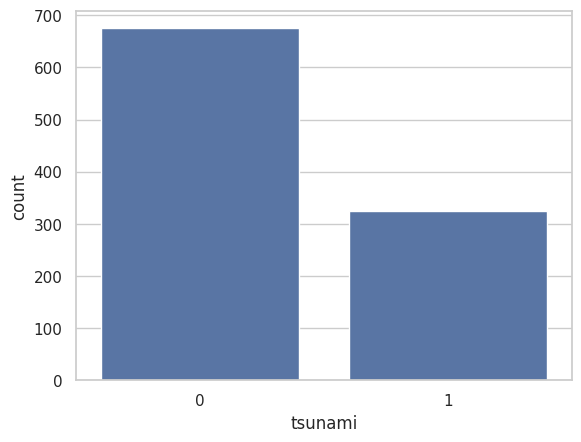

In [ ]:
sns.countplot(x=y,data=df)

In [ ]:
sm=SMOTE()
x_train,y_train=sm.fit_resample(x_train,y_train)
x_train.head()


,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,magType
0,-0.320029,0.118715,0.678866,-0.410788,2.365089,-0.543004,0.109562,-0.302971,1.449453,0.798346,-0.723000,1.552472,-1.093586
1,-0.776724,-0.782915,-2.111950,-0.589803,-0.811623,3.735207,-0.078934,-0.517124,-2.419904,-0.646804,1.339595,0.404830,0.702122
2,-0.776724,-1.083459,0.678866,-0.589803,1.356410,-0.543004,0.154637,-0.494179,0.586080,0.376304,-0.844329,0.691741,-1.093586
3,1.050056,-1.083459,0.678866,-0.019609,0.502590,-0.543004,-0.029761,-0.332799,-0.653965,0.979483,-0.116355,0.978651,-0.195732
4,0.136666,1.020345,0.678866,-0.221829,-0.372157,2.569739,0.412795,-0.091853,-0.323364,0.780691,1.582253,-0.742811,0.702122


In [ ]:
models = {
    "Logistic regression":LogisticRegression(),
    "Tree ":DecisionTreeClassifier(),
    "Ensambled":RandomForestClassifier(),
    "xg":xgb.XGBClassifier()
}

In [ ]:
for name,model in models.items():
    model.fit(x_train,y_train)
    p = model.predict(x_test)
    print("Model: " , name)
    print("------------------------------")
    print(classification_report(y_test,p))
    print(".........................................................|")

Model:  Logistic regression
------------------------------
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       140
           1       0.72      0.90      0.80        60

    accuracy                           0.86       200
   macro avg       0.84      0.88      0.85       200
weighted avg       0.88      0.86      0.87       200

.........................................................|
Model:  Tree 
------------------------------
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       140
           1       0.86      0.90      0.88        60

    accuracy                           0.93       200
   macro avg       0.91      0.92      0.91       200
weighted avg       0.93      0.93      0.93       200

.........................................................|
Model:  Ensambled
------------------------------
              precision    recall  f1-score   support

           0       0

In [ ]:
for name,model in models.items():
    model.fit(x_train,y_train)
    p = model.predict(x_test)
    print("Model: " , name)
    print("------------------------------")
    print(classification_report(y_test,p))
    print(".........................................................|")

Model:  Logistic regression
------------------------------
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       140
           1       0.72      0.90      0.80        60

    accuracy                           0.86       200
   macro avg       0.84      0.88      0.85       200
weighted avg       0.88      0.86      0.87       200

.........................................................|
Model:  Tree 
------------------------------
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       140
           1       0.84      0.90      0.87        60

    accuracy                           0.92       200
   macro avg       0.90      0.91      0.91       200
weighted avg       0.92      0.92      0.92       200

.........................................................|
Model:  Ensambled
------------------------------
              precision    recall  f1-score   support

           0       1

In [ ]:
model=RandomForestClassifier()
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid= GridSearchCV(model, params, cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
0.9242990654205607


              precision    recall  f1-score   support

           0       1.00      0.85      0.92       140
           1       0.74      1.00      0.85        60

    accuracy                           0.90       200
   macro avg       0.87      0.93      0.88       200
weighted avg       0.92      0.90      0.90       200

Axes(0.125,0.11;0.62x0.77)


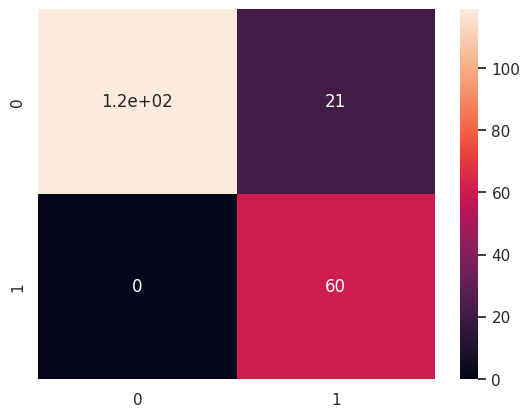

In [ ]:
p = grid.predict(x_test)
print(classification_report(y_test,p))
print(sns.heatmap(confusion_matrix(y_test,p),annot=True))